# 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)

## 1. 개요

 - LDA는 토픽모델링의 대표적인 알고리즘입니다. 토픽모델링은 문서 데이터에서 핵심 주제(Topic)를 찾는 데이터 분석 방법론입니다.
 - LDA 토픽 모델링은 방대한 양의 문서 데이터를 분석함으로써 문서 내 어떤 토픽이 어떤 비율로 구성되어 있는지를 분석하며, 토픽별로 어떤 키워드가 있는지에 대한 정보도 제공합니다.
 - LDA는 문서들이 여러 토픽의 혼합으로 구성되어 있으며, 각 토픽이 확률 분포에 기반하여 세부 단어들을 생성한다고 가정합니다. 그리고 이러한 가정에 기반해 문서의 생성 과정을 역추적합니다.
 - 뉴스 데이터 분석, SNS 토픽 분류, 리뷰 분석 및 고객 니즈 도출 등 다양한 분야에서 활발하게 사용합니다.
 - 이름에서 알 수 있듯, 다음에서 살펴볼 디리클레 분포에 기반합니다.

## 2. 디리클레 분포(참고)

#### 1)디리클레 분포 개요

 - 디리클레 분포는 확률 분포의 집합에 대한 연속적인 확률 분포를 정의하는 데 사용됩니다. 특히, 디리클레 분포는 주어진 벡터가 확률 값의 집합을 생성하는 데 사용되는 분포입니다. LDA에서는 주제 분포와 단어 분포를 모델링하는 데 활용됩니다.

 - 디리클레 분포는 K 개의 카테고리에 대한 확률 벡터 θ = θ1, θ2, ... , θK 를 모델링합니다. 이 벡터는 각 카테고리에 대한 확률을 나타내며, 모든 확률의 합은 1이 됩니다. 디리클레 분포는 다음과 같은 확률 밀도 함수(PDF)를 가집니다:
   $$
   p(θ ∣ α) = Γ(∑k=1K αk) / ( ∏k=1K Γ(αk) ) ∏k=1K θk^(αk - 1)
   $$
   - θk 는 각 카테고리의 확률을 나타냅니다.
   - α = α1, α2, ..., αK 는 디리클레 분포의 하이퍼파라미터로, 각 카테고리에 대한 사전 정보(스칼라)입니다.
   - Γ(⋅) 는 감마 함수입니다.

#### 2)디리클레 분포의 역할

- **문서의 주제 분포 (Topic Distribution for Documents)**:
   - 각 문서는 여러 주제의 혼합으로 표현됩니다. 이 혼합 비율은 디리클레 분포를 통해 모델링됩니다.
   - 문서 d의 주제 분포 θ_d 는 디리클레 분포 Dir(α)에서 샘플링됩니다.

- **주제의 단어 분포 (Word Distribution for Topics)**:
   - 각 주제는 특정 단어들에 대한 확률 분포를 가지며, 이 분포 역시 디리클레 분포를 통해 모델링됩니다.
   - 주제 k의 단어 분포 ϕ_k 는 디리클레 분포 Dir(β)에서 샘플링됩니다.


## 3. 분석 예시


- 모든 단어에 대해 토픽을 재할당하기 위해, 모든 할당이 완료될 때까지 아래의 과정을 반복 수행합니다. LDA는 문서 내 어떤 단어가 자신은 잘못된 토픽에 할당된 상태이지만, 다른 모든 단어들은 모두 올바른 토픽에 할당되어 있다고 가정합니다.

- 다음은 두 개의 문서를 예로 든 토픽 재할당 과정입니다.

#### 문서 1
| 단어   | 배  | 사과 | 배  | 비행기 | 자동차 |
|--------|-----|------|-----|--------|--------|
| 토픽   | B   | B    | ??? | A      | A      |

#### 문서 2
| 단어   | 맛  | 바나나 | 귤  | 배  | 배  |
|--------|-----|--------|-----|-----|-----|
| 토픽   | B   | B      | B   | B   | B   |

- **Step 3-1. 같은 문서 내 단어의 토픽 분포 비교**
   - 문서 1에서 3번째 단어인 '배'의 토픽을 할당하려고 합니다.
   - 첫 번째 조건은 단어가 속한 문서의 단어들이 어떤 토픽에 할당되었는지 확인하는 것입니다.
   - 문서 1 내 모든 단어들은 토픽 A와 B에 50:50의 비율로 할당되어 있기 때문에, '배'라는 단어는 토픽 A와 B 어디에도 할당될 수 있습니다.
   - 이 조건으로는 단어를 올바르게 재할당하기 어렵기 때문에, Step 3-2로 넘어갑니다.

- **Step 3-2. 타 문서 내 단어의 토픽 분포 비교**
   - 두 번째 기준은 재할당하려는 단어 '배'가 다른 문서까지 포함한 전체 문서에서 어떤 토픽에 할당되었는지 확인하는 것입니다.
   - 문서 1과 문서 2에 '배'라는 단어는 모두 토픽 B에 할당되어 있기 때문에, 이 기준을 고려하면 '배'라는 단어는 토픽 B에 재할당될 가능성이 높습니다.
   - 이처럼 Step 3-1과 Step 3-2의 기준을 활용하여 모든 문서의 모든 단어를 하나씩 재할당합니다.

## 4. LDA의 가정

- LDA는 "문서의 작성자가 다음의 가정들을 순서대로 따르며 문서를 썼을 것이다"라는 가정에 기반해 토픽모델링 분석을 수행합니다.
1. 문서에 사용할 단어의 개수 N개를 정한다
2. 문서에 사용할 토픽의 혼합을 확률 분포에 기반하여 결정한다
3. 토픽 분포에서 토픽 T를 활률적으로 고른다
4. 선택한 토픽 T 내 단어의 출현 확률 분포에 기반해 문서에 사용할 단어를 고른다

## 5. 프로세스

- 앞에서 언급한 대로, 위의 가정에 기반해서 문서의 생성 과정을 역으로 추적합니다.

1. **모델 초기화**:
   - 주제의 수 K를 설정합니다.
   - 문서 집합 D의 각 문서에 대해 초기 주제 할당을 `무작위`로 수행합니다.
   - 이를 통해 모든 문서는 토픽을 갖게 되며, 각 토픽은 단어 분포를 갖습니다.
   - 모든 단어를 임의로 할당했기 때문에 토픽 내 단어 분포의 결과는 초기 상태입니다.

2. **파라미터 설정**:
   - 디리클레 분포의 하이퍼파라미터 α와 β를 설정합니다.
     - α: 각 문서의 주제 분포에 대한 사전 정보.
     - β: 각 주제의 단어 분포에 대한 사전 정보.

3. **반복적 갱신 (Gibbs Sampling)**:
   - Gibbs Sampling을 사용하여 주제 할당을 반복적으로 갱신합니다.
   - 각 단어 w에 대해, 현재 주제 할당을 기반으로 새로운 주제를 샘플링합니다.

      **샘플링 과정**:
      - 단어 w가 문서 d에 속할 확률을 계산합니다.
      - 단어 w가 주제 k에 속할 확률을 계산합니다.
      - 주제 k가 문서 d에 속할 확률을 계산합니다.
      - 주제 k가 주어진 단어 w에 속할 확률을 계산합니다.

4. **주제 분포 및 단어 분포 업데이트**:
   - 주제 k의 단어 분포 φk를 업데이트합니다.
   - 문서 d의 주제 분포 θd를 업데이트합니다.

5. **수렴 확인**:
   - Gibbs Sampling의 반복을 통해 수렴 여부를 확인합니다.
   - 충분히 반복된 후, 최종 주제 분포와 단어 분포를 추정합니다.

6. **결과 추론**:
   - 각 문서에 대한 주제 분포 θd를 추론합니다.
   - 각 주제에 대한 단어 분포 φk를 추론합니다.

 #**요약** : 위의 과정을 간단하게 표현하면 다음과 같습니다.

   1. 토픽 개수 설정 : 사용자가 적정 토픽 개수 k를 정합니다.
   2. 단어의 토픽 할당 :
      - M개의 모든 문서 내 모든 단어를 k개의 토픽 중 하나로 `임의로` 할당합니다.
      - 이를 통해 모든 문서는 토픽을 갖게 되며, 각 토픽은 단어 분포를 갖습니다.
      - 모든 단어를 임의로 할당했기 때문에 토픽 내 단어 분포의 결과는 초기 상태입니다.
   3. 확률분포 기반 토픽 재할당 :
      - 모든 단어를 각 토픽에 재할당하기 위해 다음의 과정을 반복합니다.
      - 각 단어들을 재할당 할 때, 재할당하는 단어를 제외한 다른 모든 단어는 할당이 제대로 되어 있다고 가정합니다.
         - 같은 문서 내 단어 토픽 분포 비교 : 특정 단어가 속한 문서에서 해당 단어가 특정 토픽에 속할 확률을 계산합니다.
         - 전체 문서 내 단어 토픽 분보 비교 : 전체 문서 집합에서 특정 단어가 특정 토픽에 속할 확률을 계산합니다.




## 참고자료

https://wikidocs.net/30708

https://heytech.tistory.com/328

https://heeya-stupidbutstudying.tistory.com/entry/ML-%EC%9E%A0%EC%9E%AC-%EB%94%94%EB%A6%AC%ED%81%B4%EB%A0%88-%ED%95%A0%EB%8B%B9-%EA%B0%9C%EC%9A%94-LDALatent-Dirichlet-Allocation-1


## 코드 실습

 - 빅카인즈 제공 뉴스데이터 토픽 분석
 - '비건 식품' 및 '비건 음식' 키워드로 검색한 5년(2020.07.23~2024.07.22) 뉴스 데이터 활용

In [ ]:
import konlpy
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel  # 응집성 점수 계산
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim



# 비건 식품 5년 : 만두, 두부, 버섯, 부안군, 라면 및 정면(라면), 김밥, 제일제당, 풀무원, 친환경, 자연, 건강, 시장 등이 눈에 띔

In [ ]:
import pandas as pd
vegan_food = pd.read_excel('/content/drive/MyDrive/코딩 공부 폴더/관광데이터 분석 공모전/비건식품5년_20200723-20240722.xlsx')
vegan_food.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,4.104008e+06,20240712,프레시안,김대홍,부안 함초로 만든 비건 만두 '월드한 포부만두' 백산중 고서 시식행사,지역>경남,지역>울산,지역>부산,NaN,NaN,NaN,NaN,"전북,지구,부안군,농축산,부안,전북자치도","부안군,백산,백산중,부안","부안,함초,월드,비건,만두,포부,백산중,고서,시식행사,전북,부안,비건,Vegan,식...","비건,시식행사,부안,부안군,비건식품,백산중,고등학교,교직원,전북,저탄소,바닷물,염생...",전북 부안에서 개발한 비건(Vegan)식품인 '월드한 포부만두' 시식행사가 중 고등...,NaN,NaN
1,2.100051e+06,20240710,대한경제,박흥서,"한국농수산식품유통공사, 대한체육회와 손잡고 지구촌 대축제에 ‘저탄소 식생활’ 전파",경제>경제일반,NaN,NaN,NaN,NaN,NaN,"토니 에스탕게,정강선,이기흥,뮤리엘,김춘진,바우저","진천,프랑스,미국,파리올,워싱턴D.C.,유럽,중국,경기,라이베리아,순항,한국,아마존...","올림픽조직위원회,EU,알리바바,농림부,정부,까르푸,대한체육회,한국농수산식품유통공사,...","한국농수산식품유통공사,대한체육회,지구촌,저탄소,식생활,전파,올림픽조직위원회,저탄소,...","저탄소,식생활,미국,선수단,프랑스,대한체육회,지구촌,김춘진,세계인,유럽,이기흥,올림...",올림픽조직위원회에 보낼 저탄소 식생활 동참 촉구 서신 서명 완료 \n\n \n\n ...,http://www.dnews.co.kr/uhtml/view.jsp?idxno=20...,NaN
2,1.600601e+06,20240708,새전북신문,박상래,"한국농수산식품유통공사, 대한체육회와 손잡고 지구촌 대축제에 ‘저탄소 식생활’ 전파한다!",경제>경제일반,NaN,NaN,NaN,NaN,NaN,"토니 에스탕게,정강선,이기흥,뮤리엘,김춘진,바우저","진천,프랑스,미국,파리올,워싱턴D.C.,유럽,중국,경기,라이베리아,순항,한국,아마존...","올림픽조직위원회,EU,알리바바,농림부,정부,까르푸,대한체육회,한국농수산식품유통공사,...","한국농수산식품유통공사,대한체육회,지구촌,저탄소,식생활,전파,사장,한국농수산식품유통공...","저탄소,식생활,미국,선수단,프랑스,대한체육회,이기흥,김춘진,지구촌,세계인,유럽,한국...",한국농수산식품유통공사 김춘진 사장과 대한체육회 이기흥 회장은 8일 진천 선수촌에서 ...,http://sjbnews.com/news/news.php?number=821042,NaN
3,7.100502e+06,20240708,환경일보,이정은 기자,지구촌 대축제 '저탄소 식생활' 전파,경제>경제일반,NaN,NaN,NaN,NaN,NaN,"토니 에스탕게,장 김춘,정강선,이기흥,뮤리엘,김춘진,장 이기,바우저","프랑스,미국,파리올,워싱턴D.C.,유럽,중국,경기,라이베리아,순항,한국,아마존,일 ...","올림픽조직위원회,알리바바,농림부,대한체육회,EU,정부,와 대한체육회(회,까르푸,한국...","지구촌,저탄소,식생활,전파,대한체육회,한국농수산식품유통공사,식생활,동참,촉구,사장,...","저탄소,식생활,미국,선수단,프랑스,대한체육회,김춘진,지구촌,유럽,세계인,이기흥,한국...","aT, 대한체육회와 손잡고 저탄소 식생활 동참 촉구 [환경일보] 한국농수산식품유통공...",www.hkbs.co.kr/news/articleView.html?idxno=763547,NaN
4,4.104008e+06,20240708,프레시안,김춘수,"aT-대한체육회, 지구촌 대축제서 '저탄소 식생활' 전파",경제>경제일반,NaN,NaN,NaN,NaN,NaN,"토니 에스탕게,정강선,이기흥,뮤리엘,김춘진,바우저","진천,프랑스,미국,파리올,유럽,중국,경기,라이베리아,순항,한국,아마존,버지니아주,영...","올림픽조직위원회,알리바바,농림부,aT-대한체육회,대한체육회,EU,정부,까르푸,한국농...","aT-대한체육회,지구촌,저탄소,식생활,전파,올림픽조직위원회,저탄소,식생활,동참,촉구...","저탄소,식생활,미국,선수단,프랑스,대한체육회,지구촌,세계인,유럽,김춘진,올림픽조직위...",한국농수산식품유통공사와 대한체육회는 8일 진천 선수촌에서 저탄소 식생활 확산을 위한...,NaN,NaN


In [ ]:
# 한 글자 단어를 필터링하는 함수
def filter_one_char_words(words):
    return [word for word in words if len(word) > 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


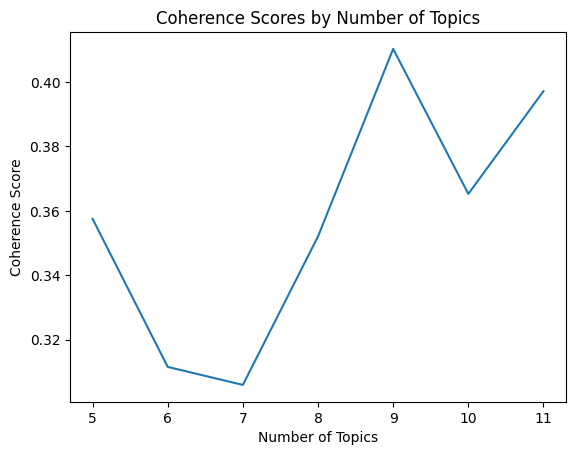

In [ ]:
okt_food = Okt()

# 필터링할 단어 리스트 (여기에 추가로 제외할 단어를 추가할 수 있습니다)
excluded_keywords = []


# 토큰화된 문서 리스트 생성, 특정 키워드 제외 및 한 글자 단어 필터링
tokenized_docs_food = [
    filter_one_char_words([word for word in okt_food.nouns(doc_food) if word not in excluded_keywords])
    for doc_food in vegan_food['본문']
]

# 문서-단어 행렬 생성
dictionary_food = corpora.Dictionary(tokenized_docs_food)
corpus_food = [dictionary_food.doc2bow(doc_food) for doc_food in tokenized_docs_food]

coherence_values_food = []
for num_topics in range(5, 12):
    # 모델 학습
    lda_model_food = gensim.models.LdaModel(corpus_food, num_topics=num_topics, id2word=dictionary_food, passes=15, random_state=100)

    # LDA 모델 시각화
    vis_food = gensimvis.prepare(lda_model_food, corpus_food, dictionary_food)
    pyLDAvis.save_html(vis_food, f'lda_{num_topics}_topics.html')  # HTML 파일로 저장

    # 응집성 점수 계산
    coherence_model_lda_food = CoherenceModel(model=lda_model_food, texts=tokenized_docs_food, dictionary=dictionary_food, coherence='c_v')
    coherence_lda_food = coherence_model_lda_food.get_coherence()
    coherence_values_food.append(coherence_lda_food)

# 응집성 점수 시각화
plt.plot(range(5, 12), coherence_values_food)  # x축 범위를 모델 학습에서 사용한 주제 수 범위와 맞춥니다.
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores by Number of Topics')
plt.show()

In [ ]:
optimal_num_topics_food = 9
lda_model_food = gensim.models.ldamodel.LdaModel(corpus_food, num_topics=optimal_num_topics_food, id2word=dictionary_food, passes=15, random_state=100)

# LDA모델 시각화 저장
vis_food = gensimvis.prepare(lda_model_food, corpus_food, dictionary_food)
pyLDAvis.save_html(vis_food, f'lda_{optimal_num_topics_food}_topics.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook() # added
vis_food = pyLDAvis.gensim.prepare(lda_model_food, corpus_food, dictionary_food, sort_topics=False)
vis_food

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.061918  0.080607       1        1  16.397457
1      0.077121 -0.036513       2        1  13.383872
2     -0.031088 -0.165311       3        1   9.667378
3     -0.006348  0.104544       4        1   8.740701
4     -0.196366 -0.033495       5        1   4.507228
5      0.070068 -0.110524       6        1  14.226588
6      0.042235  0.101027       7        1  12.760663
7     -0.113196  0.074014       8        1   6.992478
8      0.095656 -0.014349       9        1  13.323634, topic_info=    Term        Freq       Total Category  logprob  loglift
157   인증   98.000000   98.000000  Default  30.0000  30.0000
367   농심   29.000000   29.000000  Default  29.0000  29.0000
10    비건  355.000000  355.000000  Default  28.0000  28.0000
196   무역   22.000000   22.000000  Default  27.0000  27.0000
477   광주   16.000000   16.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
142   국내   14.728104   77.049038   Topic9  -4.6971   0.3609
448   최근   12.563783   50.914837   Topic9  -4.8560   0.6163
194   국제   10.208365   33.485828   Topic9  -5.0636   0.8277
635   채식   11.110323   93.511900   Topic9  -4.9789  -0.1146
336   출시   10.154756   48.484617   Topic9  -5.0689   0.4523

[557 rows x 6 columns], token_table=      Topic      Freq Term
term                      
106       1  0.058054   가공
106       2  0.145135   가공
106       6  0.145135   가공
106       7  0.029027   가공
106       9  0.609567   가공
...     ...       ...  ...
620       2  0.862919   획득
620       6  0.078447   획득
843       1  0.918269   후속
1121      3  0.734470  휴게소
938       8  0.768880   흰색

[1071 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
lda_model_food.save('/content/drive/MyDrive/코딩 공부 폴더/관광데이터 분석 공모전/lda_model_food.pkl')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



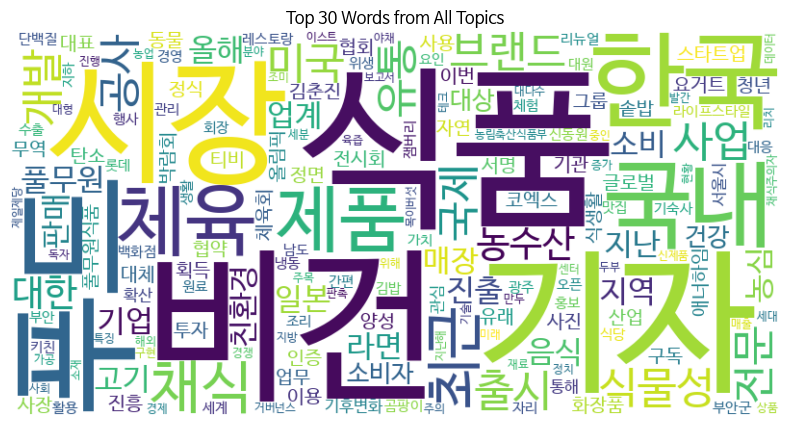

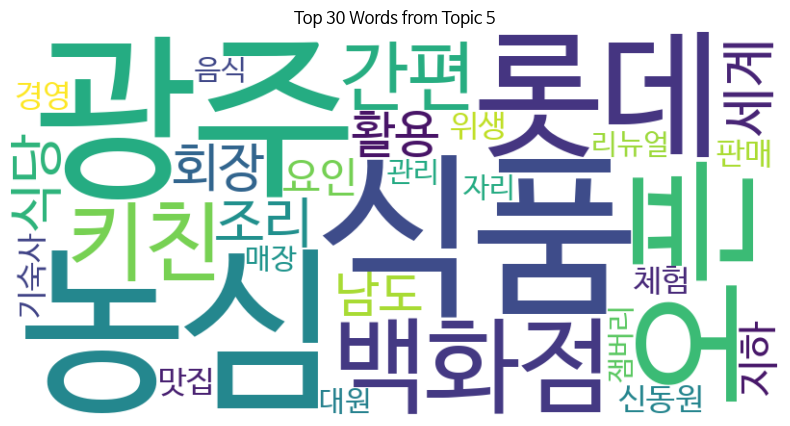

In [ ]:
top_words_food = get_top_n_words(lda_model_food, num_words=30)

# 전체 주제의 상위 30개 단어 워드 클라우드 시각화
plot_wordcloud_for_all_topics(top_words_food)

# 특정 주제(Topic 5)의 상위 30개 단어 워드 클라우드 시각화
topic_id = 5
plot_wordcloud_for_topic(top_words_food, topic_id)

# 비건음식5년 : 사찰, 전남, 지리산, 구례, 화엄사, 전주, 장성군, 김치 등이 눈에 띔

In [ ]:
vegan_cuisine = pd.read_excel('/content/drive/MyDrive/코딩 공부 폴더/관광데이터 분석 공모전/비건음식5년_20200723-20240722.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



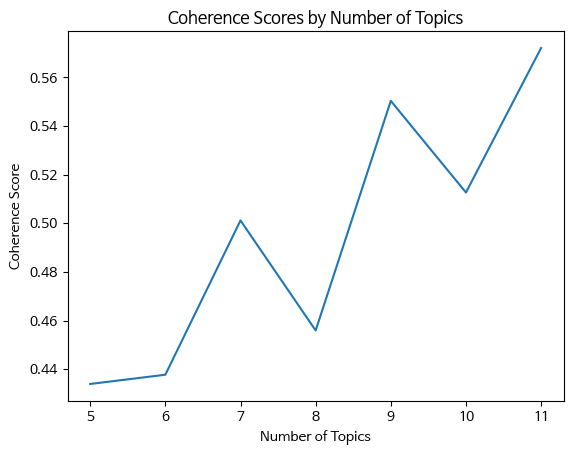

In [ ]:
okt_cuisine = Okt()

# 필터링할 단어 리스트 (여기에 추가로 제외할 단어를 추가할 수 있습니다)
excluded_keywords = []


# 토큰화된 문서 리스트 생성, 특정 키워드 제외 및 한 글자 단어 필터링
tokenized_docs_cuisine = [
    filter_one_char_words([word for word in okt_cuisine.nouns(doc_cuisine) if word not in excluded_keywords])
    for doc_cuisine in vegan_cuisine['본문']
]

# 문서-단어 행렬 생성
dictionary_cuisine = corpora.Dictionary(tokenized_docs_cuisine)
corpus_cuisine = [dictionary_cuisine.doc2bow(doc_cuisine) for doc_cuisine in tokenized_docs_cuisine]

coherence_values_cuisine = []
for num_topics in range(5, 12):
    # 모델 학습
    lda_model_cuisine = gensim.models.LdaModel(corpus_cuisine, num_topics=num_topics, id2word=dictionary_cuisine, passes=15, random_state=100)

    # LDA 모델 시각화
    vis_cuisine = gensimvis.prepare(lda_model_cuisine, corpus_cuisine, dictionary_cuisine)
    pyLDAvis.save_html(vis_cuisine, f'lda_{num_topics}_topics.html')  # HTML 파일로 저장

    # 응집성 점수 계산
    coherence_model_lda_cuisine = CoherenceModel(model=lda_model_cuisine, texts=tokenized_docs_cuisine, dictionary=dictionary_cuisine, coherence='c_v')
    coherence_lda_cuisine = coherence_model_lda_cuisine.get_coherence()
    coherence_values_cuisine.append(coherence_lda_cuisine)

# 응집성 점수 시각화
plt.plot(range(5, 12), coherence_values_cuisine)  # x축 범위를 모델 학습에서 사용한 주제 수 범위와 맞춥니다.
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores by Number of Topics')
plt.show()

In [ ]:
optimal_num_topics_cuisine = 9
lda_model_cuisine = gensim.models.ldamodel.LdaModel(corpus_cuisine, num_topics=optimal_num_topics_cuisine, id2word=dictionary_cuisine, passes=15, random_state=100)

# LDA모델 시각화 저장
vis_cuisine = gensimvis.prepare(lda_model_cuisine, corpus_cuisine, dictionary_cuisine)
pyLDAvis.save_html(vis_cuisine, f'lda_{optimal_num_topics_cuisine}_topics.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pyLDAvis.enable_notebook() # added
vis_cuisine = pyLDAvis.gensim.prepare(lda_model_cuisine, corpus_cuisine, dictionary_cuisine, sort_topics=False)
vis_cuisine

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.031670 -0.059253       1        1   8.947696
1     -0.072333 -0.068689       2        1  12.072320
2      0.138290  0.180231       3        1  12.017891
3      0.065568 -0.008567       4        1   5.670060
4      0.021691 -0.030140       5        1   5.829820
5     -0.244275  0.105401       6        1  17.343954
6      0.040295 -0.005888       7        1  19.778484
7      0.007277 -0.114530       8        1  16.161967
8      0.011817  0.001435       9        1   2.177809, topic_info=    Term       Freq      Total Category  logprob  loglift
109   청년  17.000000  17.000000  Default  30.0000  30.0000
61    관광  24.000000  24.000000  Default  29.0000  29.0000
287   사찰  13.000000  13.000000  Default  28.0000  28.0000
92    관악   8.000000   8.000000  Default  27.0000  27.0000
34    세계  16.000000  16.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
215   교사   0.035878   1.364260   Topic9  -7.0619   0.1886
216   교육   0.036174   2.797313   Topic9  -7.0537  -0.5212
217   대선   0.036156   2.797335   Topic9  -7.0542  -0.5217
21    학생   0.036246   4.693130   Topic9  -7.0517  -1.0367
233   학교   0.036186   3.885740   Topic9  -7.0533  -0.8495

[439 rows x 6 columns], token_table=      Topic      Freq Term
term                      
436       1  0.314693  가운데
436       7  0.314693  가운데
436       8  0.314693  가운데
538       1  0.375088  간편식
538       2  0.375088  간편식
...     ...       ...  ...
58        5  0.116004   활용
58        6  0.464016   활용
58        7  0.116004   활용
58        8  0.116004   활용
435       8  0.810851  휴게소

[504 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



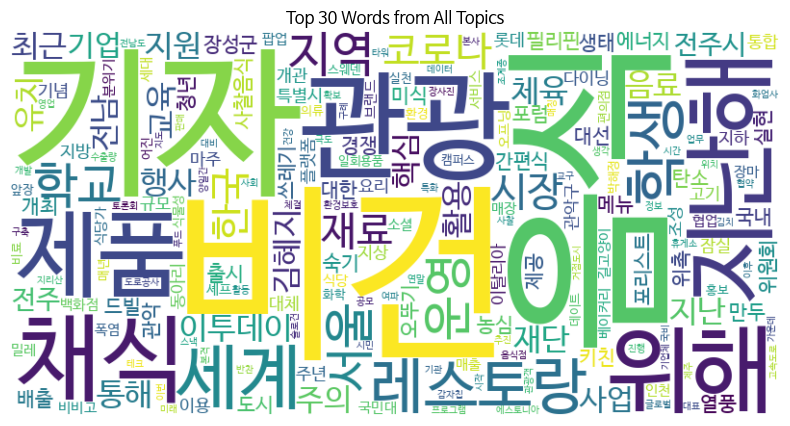

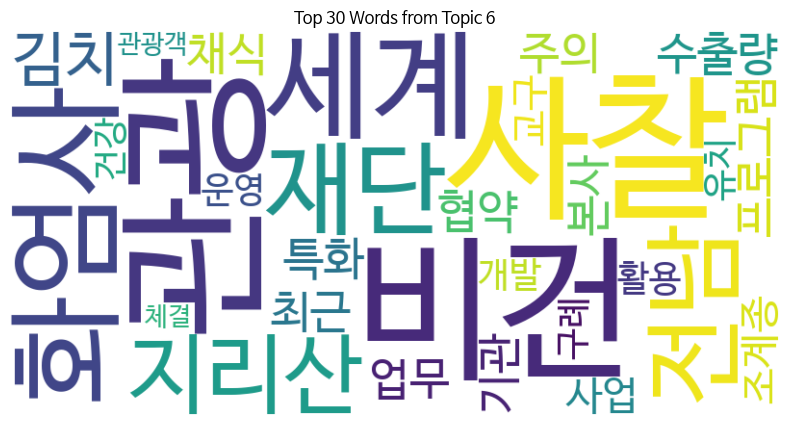

In [ ]:
top_words_cuiine = get_top_n_words(lda_model_cuisine, num_words=30)

# 전체 주제의 상위 30개 단어 워드 클라우드 시각화
plot_wordcloud_for_all_topics(top_words_cuiine)

# 특정 주제(Topic 6)의 상위 30개 단어 워드 클라우드 시각화
topic_id = 6
plot_wordcloud_for_topic(top_words_cuiine, topic_id)